# EDA

### Importación de librerías
Se importan las librerías necesarias para la manipulación de datos, visualización y conexión con MySQL.

In [2]:
import os
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

### Carga de variables de entorno
Se cargan las credenciales de conexión a la base de datos desde un archivo de entorno (`.env`).

In [3]:
# Cargar variables de entorno
load_dotenv()

# Configuración de credenciales de MySQL
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")


### Extracción de datos desde MySQL
Se define una función para conectarse a la base de datos MySQL y extraer los datos de la tabla `customer_churn_extract`.

In [4]:
# Función para extraer datos desde MySQL
def fetch_data():
    """Extrae los datos desde la base de datos MySQL."""
    conn = mysql.connector.connect(
        host=DB_HOST,
        user=DB_USER,
        password=DB_PASSWORD,
        database=DB_NAME
    )
    query = "SELECT * FROM customer_churn_extract;"
    df = pd.read_sql(query, conn)
    conn.close()
    return df

# Extraer datos
df = fetch_data()

# Vista previa de los datos
df.head()

C:\Users\juanm\AppData\Local\Temp\ipykernel_38940\2370940405.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


### Información general del dataset
Se revisa la cantidad de valores nulos, el tipo de datos de cada columna y el tamaño del dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        12043 non-null  object 
 1   gender            12043 non-null  object 
 2   SeniorCitizen     12043 non-null  int64  
 3   Partner           12043 non-null  object 
 4   Dependents        12043 non-null  object 
 5   tenure            12043 non-null  int64  
 6   PhoneService      12043 non-null  object 
 7   MultipleLines     12043 non-null  object 
 8   InternetService   12043 non-null  object 
 9   OnlineSecurity    12043 non-null  object 
 10  OnlineBackup      12043 non-null  object 
 11  DeviceProtection  12043 non-null  object 
 12  TechSupport       12043 non-null  object 
 13  StreamingTV       12043 non-null  object 
 14  StreamingMovies   12043 non-null  object 
 15  Contract          12043 non-null  object 
 16  PaperlessBilling  12043 non-null  object

In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,12043.000000,12043.000000,12043.000000,12032.000000
mean,0.306817,34.265382,66.594166,2976.895548
std,0.461192,23.152932,29.527709,2442.548608
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,13.000000,41.935000,770.575000
50%,0.000000,33.000000,70.050000,2369.175000
75%,1.000000,55.000000,90.800000,4992.835000
max,1.000000,72.000000,119.990000,8684.800000


C:\Users\juanm\AppData\Local\Temp\ipykernel_38940\4218149215.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn'], palette="pastel")


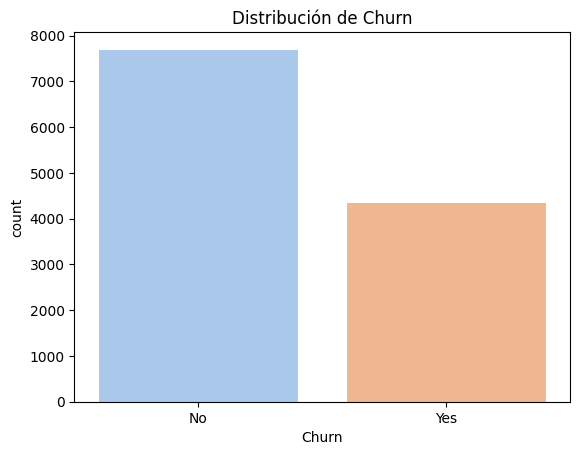

In [8]:
sns.countplot(x=df['Churn'], palette="pastel")
plt.title("Distribución de Churn")
plt.show()

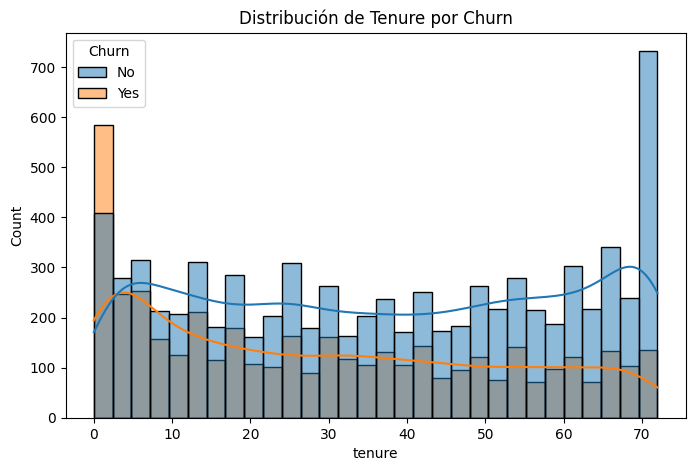

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, bins=30)
plt.title("Distribución de Tenure por Churn")
plt.show()

In [10]:
# Revisar valores únicos para cada columna categórica
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} valores únicos")
    print(df[col].unique())
    print("------")

customerID: 12043 valores únicos
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9993-LHIEB' '9995-HOTOH'
 '9997-LJEML']
------
gender: 2 valores únicos
['Female' 'Male']
------
Partner: 2 valores únicos
['Yes' 'No']
------
Dependents: 2 valores únicos
['Yes' 'No']
------
PhoneService: 2 valores únicos
['Yes' 'No']
------
MultipleLines: 3 valores únicos
['No' 'Yes' 'No phone service']
------
InternetService: 3 valores únicos
['DSL' 'Fiber optic' 'No']
------
OnlineSecurity: 3 valores únicos
['No' 'Yes' 'No internet service']
------
OnlineBackup: 3 valores únicos
['Yes' 'No' 'No internet service']
------
DeviceProtection: 3 valores únicos
['No' 'Yes' 'No internet service']
------
TechSupport: 3 valores únicos
['Yes' 'No' 'No internet service']
------
StreamingTV: 3 valores únicos
['Yes' 'No' 'No internet service']
------
StreamingMovies: 3 valores únicos
['No' 'Yes' 'No internet service']
------
Contract: 3 valores únicos
['One year' 'Month-to-month' 'Two year']
------
PaperlessBilling: 2 

## Transformaciones

### 1. Manejo de valores nulos
**Motivo:**
Detectamos que **`TotalCharges`** tiene valores nulos. Como es una variable numérica, los rellenamos con la mediana, ya que la media podría verse afectada por valores extremos.

In [11]:
# Eliminar filas con valores nulos
df = df.dropna()

### 2. Conversión de variables categóricas
**Motivo:**
- One-hot encoding facilita el análisis visual y la integración con dashboards.
- Reemplazo de valores binarios mejora la claridad de los datos.
- Agrupación de servicios elimina redundancias.

One-Hot Encoding para:

In [12]:
df = pd.get_dummies(df, columns=["Contract", "PaymentMethod", "InternetService"], drop_first=True)

Reemplazo de valores binarios en **`SeniorCitizen`**

In [13]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})

Agrupar "No internet service" y "No phone service" en "No"

In [14]:
cols_services = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]

for col in cols_services:
    df[col] = df[col].replace({"No internet service": "No", "No phone service": "No"})

Crear columna para contratos largos

In [15]:
df["LongTermContract"] = df["Contract_One year"] + df["Contract_Two year"]

### 3. Creación de nuevas variables
**Motivo:**
- Facilitar la visualización de patrones y tendencias en churn.
- Crear métricas útiles para análisis.

Agrupar **`tenure`** en rangos de permanencia

In [18]:
bins = [0, 12, 24, 48, 72]  # Quitamos el valor duplicado
labels = ["0-12", "13-24", "25-48", "49-72"]  # Un elemento menos que los bins
df["tenure_group"] = pd.cut(df["tenure"], bins=bins, labels=labels, include_lowest=True)

Crear columna de clientes nuevos (**`isNewCustomer`**)

In [19]:
df["AvgMonthlySpend"] = df["TotalCharges"] / df["tenure"]
df["AvgMonthlySpend"] = df["AvgMonthlySpend"].fillna(df["MonthlyCharges"])  # Evitar divisiones por 0

C:\Users\juanm\AppData\Local\Temp\ipykernel_38940\3785503486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["AvgMonthlySpend"].fillna(df["MonthlyCharges"], inplace=True)  # Evitar divisiones por 0


Crear columna de clientes con múltiples servicios (**`MultipleServices`**)

In [20]:
df["isNewCustomer"] = (df["tenure"] < 12).astype(int)

Crear columna para detectar clientes con bajo gasto mensual (**`LowSpender`**)

In [22]:
# Convertir las columnas relevantes a valores numéricos antes de la suma
df["PhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})
df["InternetService_Fiber optic"] = df["InternetService_Fiber optic"].astype(int)  # Si ya está en dummies
df["StreamingTV"] = df["StreamingTV"].map({"Yes": 1, "No": 0, "No internet service": 0})
df["StreamingMovies"] = df["StreamingMovies"].map({"Yes": 1, "No": 0, "No internet service": 0})

# Crear la nueva columna sumando los servicios activos
df["MultipleServices"] = df[["PhoneService", "InternetService_Fiber optic", "StreamingTV", "StreamingMovies"]].sum(axis=1)

Crear columna de riesgo de churn basado en contrato y pago (**`HighRiskChurn`**)

In [23]:
q1 = df["MonthlyCharges"].quantile(0.25)  # Primer cuartil
df["LowSpender"] = (df["MonthlyCharges"] <= q1).astype(int)

In [25]:
print(df.columns)  # Verifica si existe "Contract_Month-to-month"

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'LongTermContract',
       'tenure_group', 'AvgMonthlySpend', 'isNewCustomer', 'MultipleServices',
       'LowSpender'],
      dtype='object')


In [26]:
df["Contract_Month-to-month"] = 1 - df[["Contract_One year", "Contract_Two year"]].sum(axis=1)

In [27]:
print(df.columns)  # Verifica si existe "Contract_Month-to-month"

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'LongTermContract',
       'tenure_group', 'AvgMonthlySpend', 'isNewCustomer', 'MultipleServices',
       'LowSpender', 'Contract_Month-to-month'],
      dtype='object')


In [28]:
df["HighRiskChurn"] = ((df["Contract_Month-to-month"] == 1) & (df["PaymentMethod_Electronic check"] == 1)).astype(int)

## Normalización de variables numéricas
**Motivo:**
Permite comparar métricas en una escala similar y facilita la interpretación gráfica.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["MonthlyCharges", "TotalCharges", "AvgMonthlySpend"]] = scaler.fit_transform(df[["MonthlyCharges", "TotalCharges", "AvgMonthlySpend"]])

## Guardado de datos transformados
Finalmente, guardamos los datos en MySQL para la fase de carga y visualización.

(Por ahora solo planteado, se esta generando un CSV limpio y en la proxima fase se implementa la carga)

In [32]:
df.to_csv("../data/telco_churn_clean.csv", index=False)